# The harmonic oscillator

##### The linear harmonic oscillator in its damped version.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## The equation system
The equation of a harmonic oscillator is given as a differential equation of second order
$$m\ddot{y}(t)+\gamma\dot{y}(t)+k\cdot y(t)=f(t)$$
where $m$ is the mass, $\gamma$ is the damping constant, and $k$ is the spring constant, while $f(t)$ is an external force acting on the oscillator. We wish to transform this second order differential equation to a system of first order differential equations, setting $m=1$, $\gamma=0$, and $k=1$. To this we set $x=y$ and $v=\dot{x}$ to read
\begin{align*}
\dot{x}=v\\
\dot{v}=-x
\end{align*}
where the first line is just the definition used.

Interpretation: The rate of change in time of the position $x$ is the velocity $v$. The rate of change in time of the velocity is the negative position. This is motivated by a spring force acting against the direction of motion. For the damped harmonic oscillator we add a damping force proportional to the velocity so that it reads
\begin{align*}
\dot{x}=v\\
\dot{v}=-\gamma v-x
\end{align*}
Let us give it a try with a naive ansatz replacing the derivative with a finite difference
$$\dot{g(t)}\rightarrow\lim_{\Delta t\rightarrow 0}\frac{g(t+\Delta t)-g(t)}{\Delta t}\approx\frac{g(t+\Delta t)-g(t)}{\Delta t}$$



In [17]:
# This is for solving the system of DEs
dt=.001
n=100000
y1=np.empty(n)
y2=np.empty(n)

In [3]:
# This is for plotting


# Solution using numerical libraries

In [8]:
# This defines the function of the coupled system of 1st order differential equations
def func(r,t):        # enter the parameters where r contains both x and v
    gamma=0.0        # define the damping
    x,v=r             # disentangle r to x and v
    dxdt=v            # 1st equation
    dvdt=-gamma*v-x   # 2nd equation
    return dxdt,dvdt  # give back the result for the integrator

<IPython.core.display.Javascript object>


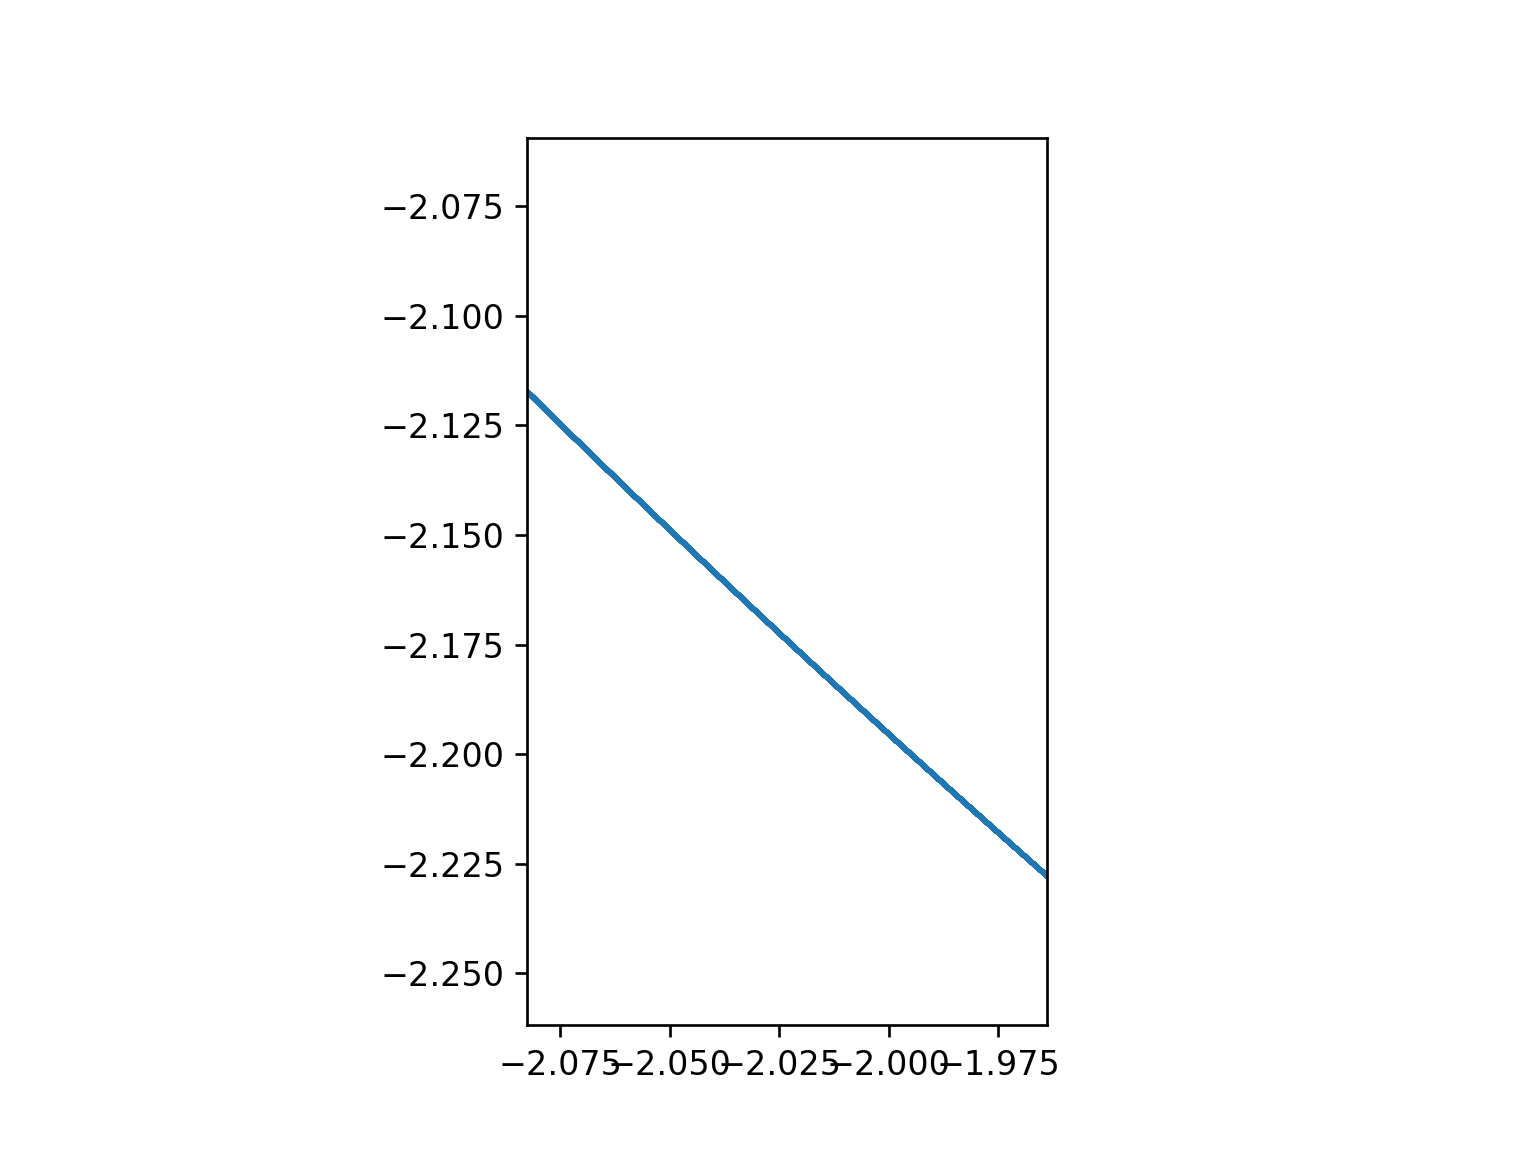

In [9]:
%matplotlib notebook
r0=(2.1,2.1)                   # Initial condition
t=np.linspace(0,1000,100000)     # define a time interval from 0 to 100 in 10000 timesteps
pos=odeint(func,r0,t)          # integrate the differential equations from t=0 to t=100
x=pos[:,0]                     # Plot it
v=pos[:,1]
plt.gca().set_aspect(1)
plt.plot(x,v,'-')
plt.show()

In [ ]:
%matplotlib notebook
plt.plot(t,x,'r')
plt.plot(t,v,'b')
plt.show()

<IPython.core.display.Javascript object>


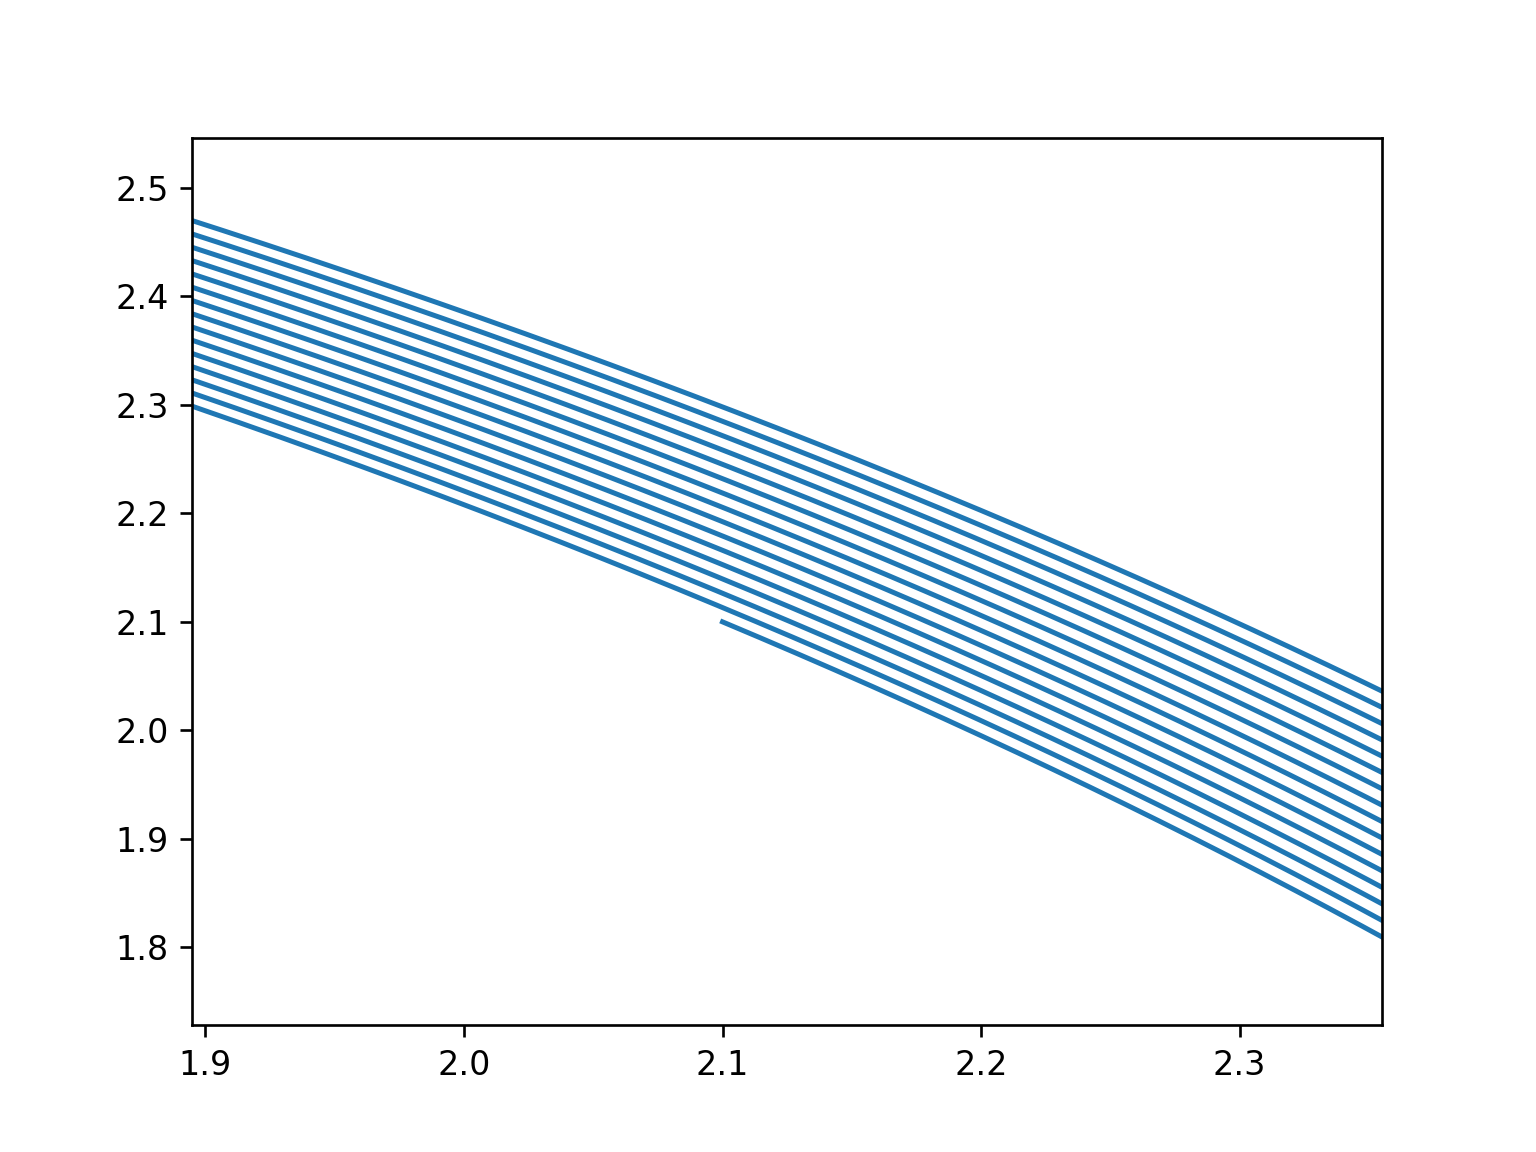

In [18]:
%matplotlib notebook
y1[0]=2.1
y2[0]=2.1
for t in np.arange(1,n):
    y1[t]=y1[t-1]+y2[t-1]*dt
    y2[t]=y2[t-1]-y1[t-1]*dt
plt.plot(y1,y2)

In [3]:
%matplotlib notebook
r0=(2.1,2.1)
gamma=0.0
dt=0.5
x=np.zeros(10000)
v=np.zeros(10000)
x[0],y[0]=r0
for i in range(1,10000):
    x[i]=x[i-1]+v[i-1]*dt
    v[i]=v[i-1]-(gamma*v[i-1]+x[i])*dt
plt.plot(x,v,'-')
plt.show()

NameError: name 'y' is not defined

In [ ]:
%matplotlib notebook
r0=(2.1,2.1)
gamma=0.0
dt=0.01
x=np.zeros(10000)
y=np.zeros(10000)
x[0],y[0]=r0
for i in range(1,10000):
    y[i]=y[i-1]-(gamma*y[i-1]+x[i-1])*dt
    x[i]=x[i-1]+y[i]*dt
plt.plot(x,y,'-')
plt.show()